In [47]:
import pandas as pd
import os
import json
import numpy as np
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
from nameparser import HumanName
from ethnicolr import pred_census_ln
from collections import Counter, defaultdict
from matplotlib.lines import Line2D


In [48]:
path_connected_data = "C:\\Users\\tykun\\OneDrive\\Documents\\SchoolDocs\\VSCodeProjects\\connectedData\\"
path_temp_data = "C:\\Users\\tykun\\OneDrive\\Documents\\SchoolDocs\\VSCodeProjects\\connectedData\\temporaryData\\"
year = "2009"
valid_years = ["1999", "2000", "2005", "2008", "2009"]

path_read = f"{path_connected_data}{year}_split_positions.csv"
boards_path = f"{path_temp_data}{year}_boards.csv"

In [49]:
average_board_sizes = {}
for year in valid_years:  
    boards_path = f"{path_temp_data}{year}_boards.csv"
    board_df = pd.read_csv(boards_path)
    board_grouped = board_df.groupby("Institution")
    board_counts = Counter()
    for key, value in board_grouped:
        board_counts[key] = len(value)
    average_board_size = sum(board_counts.values()) / len(board_counts) if len(board_counts) > 0 else 0
    average_board_sizes[year] = average_board_size
    print(year + ":" , board_counts)


1999: Counter({'Carnegie Mellon University': 96, 'California Lutheran University': 92, 'Depaul University': 86, 'Abilene Christian University': 84, 'Loyola University': 79, 'Marylhurst College': 75, 'Boston University': 72, 'Long Island University': 71, 'Rutgers State University Of New Jersey': 67, 'Texas Wesleyan University': 67, 'Johns Hopkins University': 62, 'Illinois Institute Of Technology': 60, 'Willamette University': 59, 'University Of Rochester': 58, 'Gonzaga University': 57, 'Oral Roberts University': 57, 'Massachusetts Institute Of Technology [Mit]': 56, 'University Of Notre Dame': 55, 'New Jersey Institute Of Technology': 54, 'Case Western Reserve University': 53, 'University Of Miami': 53, 'New School University': 52, 'University Of Pittsburgh': 52, 'Yeshiva University': 51, 'Baldwin Wallace College': 50, 'California Institute Of Technology': 50, 'Goucher College': 50, 'Seattle University': 50, 'Tennessee Board Of Regents': 50, 'University Of Richmond': 50, 'Washington Un

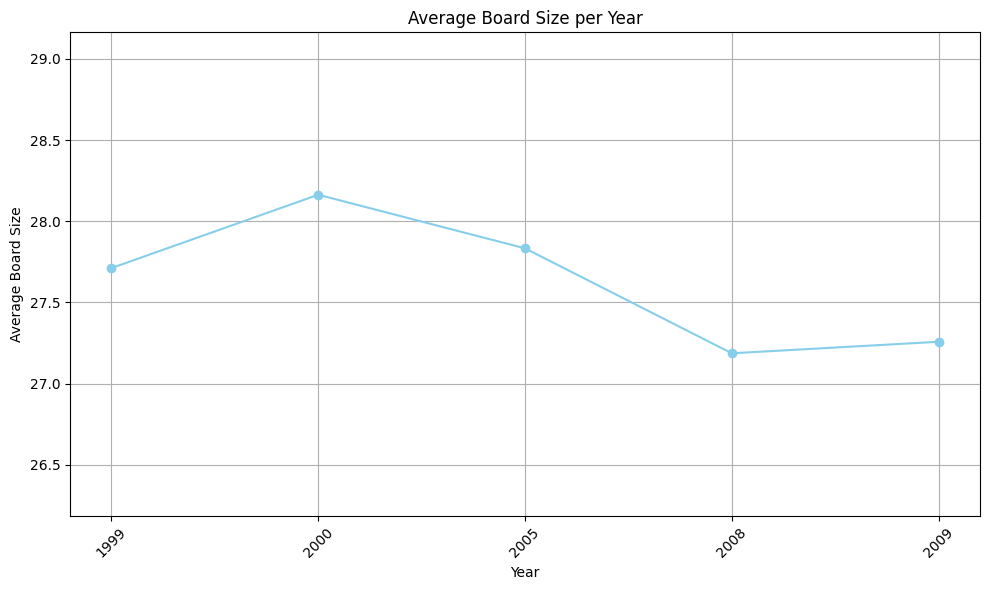

In [50]:
years = list(average_board_sizes.keys())
average_sizes = list(average_board_sizes.values())

plt.figure(figsize=(10, 6))
plt.plot(years, average_sizes, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Board Size')
plt.title('Average Board Size per Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Adjust y-axis scale to start from a value close to the minimum average board size
min_avg_size = min(average_sizes)
max_avg_size = max(average_sizes)
plt.ylim(min_avg_size - 1, max_avg_size + 1)
plt.show()

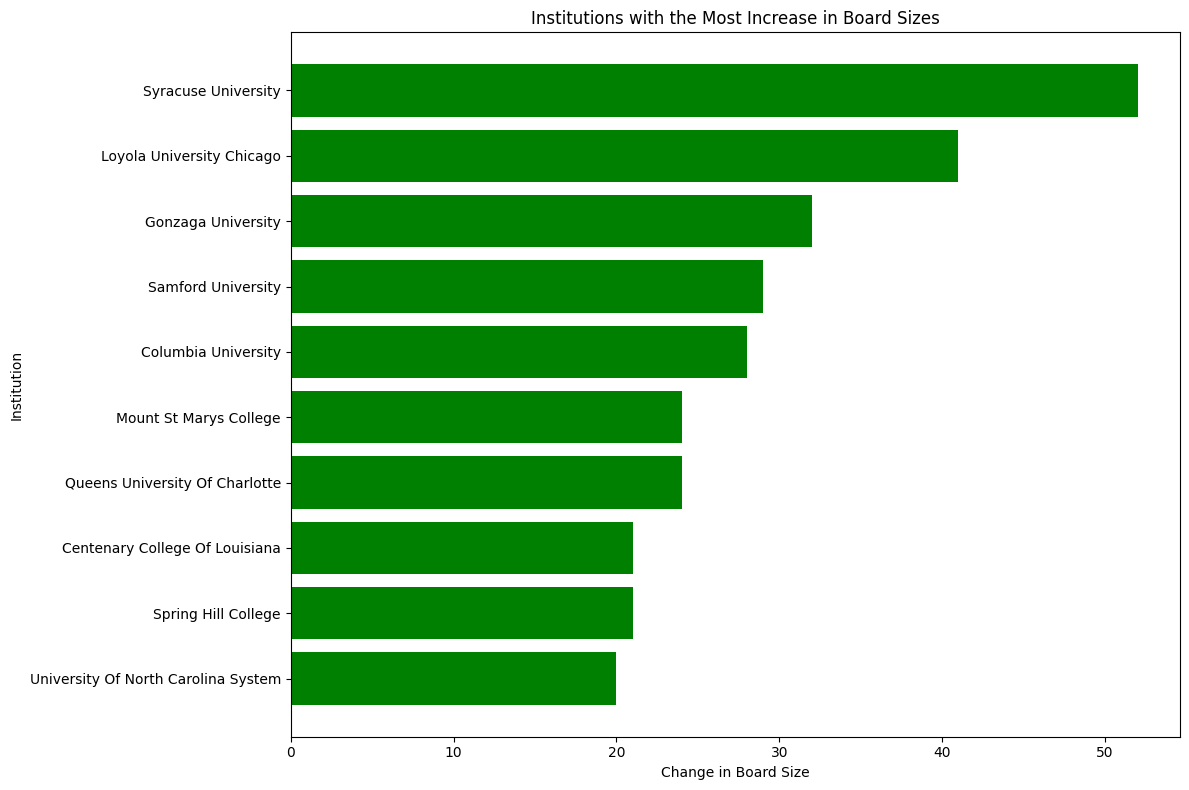

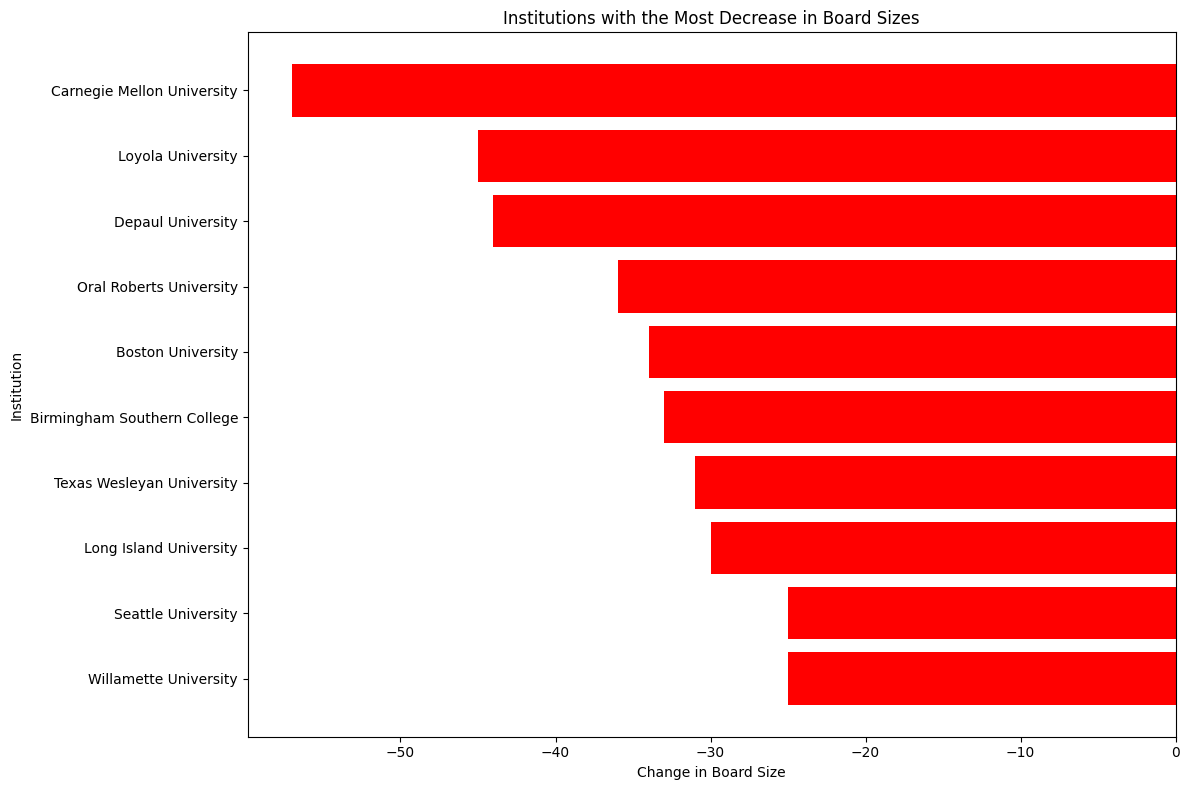

Institutions with the Most Increase in Board Sizes:
Syracuse University: 52 (increase), from 23 in 1999 to 75 in 2009
Loyola University Chicago: 41 (increase), from 4 in 1999 to 45 in 2009
Gonzaga University: 32 (increase), from 57 in 1999 to 89 in 2009
Samford University: 29 (increase), from 18 in 1999 to 47 in 2000
Columbia University: 28 (increase), from 26 in 1999 to 54 in 2009
Mount St Marys College: 24 (increase), from 40 in 2000 to 64 in 2009
Queens University Of Charlotte: 24 (increase), from 13 in 2000 to 37 in 2009
Centenary College Of Louisiana: 21 (increase), from 49 in 1999 to 70 in 2009
Spring Hill College: 21 (increase), from 22 in 1999 to 43 in 2009
University Of North Carolina System: 20 (increase), from 12 in 1999 to 32 in 2009

Institutions with the Most Decrease in Board Sizes:
Carnegie Mellon University: -57 (decrease), from 96 in 1999 to 39 in 2009
Loyola University: -45 (decrease), from 79 in 1999 to 34 in 2000
Depaul University: -44 (decrease), from 86 in 1999 t

In [51]:

# Dictionary to store the board sizes for each institution across years
institution_board_sizes = defaultdict(dict)

for year in valid_years:
    boards_path = f"{path_temp_data}{year}_boards.csv"
    board_df = pd.read_csv(boards_path)
    board_grouped = board_df.groupby("Institution")
    
    for institution, group in board_grouped:
        institution_board_sizes[institution][year] = len(group)

# Calculate the change in board size for each institution
board_size_changes = {}

for institution, sizes in institution_board_sizes.items():
    if len(sizes) > 1:  # Only consider institutions that have data for more than one year
        sorted_years = sorted(sizes.keys())
        min_year = sorted_years[0]
        max_year = sorted_years[-1]
        min_size = sizes[min_year]
        max_size = sizes[max_year]
        change = max_size - min_size
        board_size_changes[institution] = (change, min_size, min_year, max_size, max_year)

# Separate the changes into increases and decreases
increases = {inst: data for inst, data in board_size_changes.items() if data[0] > 0}
decreases = {inst: data for inst, data in board_size_changes.items() if data[0] < 0}

# Sort by the absolute value of the change
sorted_increases = sorted(increases.items(), key=lambda x: x[1][0], reverse=True)[:10]
sorted_decreases = sorted(decreases.items(), key=lambda x: x[1][0])[:10]

# Plot increases
institutions_increase = [institution for institution, (change, min_size, min_year, max_size, max_year) in sorted_increases]
changes_increase = [change for institution, (change, min_size, min_year, max_size, max_year) in sorted_increases]

plt.figure(figsize=(12, 8))
plt.barh(institutions_increase, changes_increase, color='green')
plt.xlabel('Change in Board Size')
plt.ylabel('Institution')
plt.title('Institutions with the Most Increase in Board Sizes')
plt.gca().invert_yaxis()  # Invert y-axis to display the institution with the most change at the top
plt.tight_layout()
plt.show()

# Plot decreases
institutions_decrease = [institution for institution, (change, min_size, min_year, max_size, max_year) in sorted_decreases]
changes_decrease = [change for institution, (change, min_size, min_year, max_size, max_year) in sorted_decreases]

plt.figure(figsize=(12, 8))
plt.barh(institutions_decrease, changes_decrease, color='red')
plt.xlabel('Change in Board Size')
plt.ylabel('Institution')
plt.title('Institutions with the Most Decrease in Board Sizes')
plt.gca().invert_yaxis()  # Invert y-axis to display the institution with the most change at the top
plt.tight_layout()
plt.show()

# Print details
print("Institutions with the Most Increase in Board Sizes:")
for institution, (change, min_size, min_year, max_size, max_year) in sorted_increases:
    print(f"{institution}: {change} (increase), from {min_size} in {min_year} to {max_size} in {max_year}")

print("\nInstitutions with the Most Decrease in Board Sizes:")
for institution, (change, min_size, min_year, max_size, max_year) in sorted_decreases:
    print(f"{institution}: {change} (decrease), from {min_size} in {min_year} to {max_size} in {max_year}")
